# CS7324 - Lab 1:
### Isabela Salomon, Zach Bohl, Luigi Allen
Intel Image Classification: https://www.kaggle.com/datasets/puneet6060/intel-image-classification

# 1 - Business Understanding


### Business Understanding

The dataset consists of around 25,000 images of natural scenes from various locations around the world. These images are categorized into six distinct categories: buildings, forest, glacier, mountain, sea, and street. The primary purpose of this dataset is to facilitate image classification tasks, specifically for the development of machine learning models capable of identifying and categorizing natural scenes based on visual features.

### Additional Business Understanding (J)

A specialized travel community website could use this image dataset to create a dynamic and personalized platform that improves user experience by automatically sharing and discovering travel experiences. Using this dataset to train a landscape classification models, the developers can create an AI system that automatically categorizes user uploaded photos of landscapes and destinations. This allows members to automatically organize and explore image libraries based off their classification. This could allow the platform to offer personalized travel recommendations based on users' activity within a given category. For example, if a member frequently uploads or interacts with images of mountains or forests, the system can suggest comparable nature-focused destinations or travel itineraries shared by other community members. Similarly, if a user consistently uploads a specific landscape, it could recommend new destinations to build diversity in user interest.

Additionally, this image classification system powers could grow platform experience, such as Discover Similar Destinations, encouraging users to stay longer on the site, leading to increased ad revenue. The image classification can play a role in an intelligent content organization system, with professional photos and travel stories being automatically tagged and categorized. This would make it easier for users to find relevant content and inspiration. As part of an integrated broader machine learning pipeline, the image classification can help find trends in the types of images with the most engagement, as well as part of a recommendation engine for vacations and experiences that resonate with the user and/or community interests. Although it may not account for an entire pipeline, the image classification system could help enhance user interaction and drive site growth, ultimately leading to larger revenues.

More importantly, this image classification system could be the building block for more advanced features. As the building block, it could lead to a development of a hierarchical classification system that can identify not just broad landscape types, but specific landmarks or destinations. For example, the system could evolve from identifying a photo as "mountains" to recognizing it as the Rockies. As the system acquires more images from users, it could incorporate re-training algorithms to periodically improve its accuracy and expand its classification capabilities.



#### Purpose and Data Collection
The dataset was originally collected and provided by Intel for a public image classification challenge on DataHack, aiming to encourage research and development in image recognition. It is designed for the training and evaluation of machine learning algorithms in a well-defined classification task. 

#### Prediction Task and Stakeholders
The prediction task involves correctly classifying images into one of the six categories based on their visual content. Third parties that might be interested in the results of this task include:

1. **Tech companies** working on image recognition software, especially those developing autonomous systems or mobile applications that rely on scene understanding.
2. **Tourism and mapping companies** (e.g., Google Maps or National Geographic), which could use the results to automatically categorize and organize large volumes of location-based imagery.
3. **Environmental researchers and agencies**, who may use the model to analyze landscape images for environmental monitoring and land classification.
4. **Real estate and urban planning firms**, for understanding and analyzing trends in urban and rural scenes.

#### Importance of the Data
This data is important because scene recognition is crucial in many industries, from self-driving car navigation to environmental conservation. Automated classification of landscapes can speed up processes that would otherwise require manual tagging, allowing industries to process and make decisions from visual data more efficiently. The accuracy of the classification directly impacts the usability of the model for these applications.

#### Model Performance Expectations
To be useful for stakeholders, the model would need to perform with high accuracy—preferably over 90%. However, the performance threshold may vary depending on the use case. For autonomous systems, higher precision would be required to avoid errors in navigation or environmental monitoring. For general applications, slightly lower accuracy might be acceptable if it still reduces the time and cost of manual image classification.


# DELETE HERE
About Dataset
Context
This is image data of Natural Scenes around the world.

Content
This Data contains around 25k images of size 150x150 distributed under 6 categories.
{'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }

The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction.
This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.

Acknowledgements
Thanks to https://datahack.analyticsvidhya.com for the challenge and Intel for the Data

Photo by Jan Böttinger on Unsplash

Inspiration
Want to build powerful Neural network that can classify these images with more accuracy.

# 2 - Data Preparation

In [2]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt


In [3]:
# Define the paths to training and testing data
train_dir = 'archive/seg_train/seg_train'  # Replace with your path
test_dir = 'archive/seg_test/seg_test'

# Categories present in the dataset
categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
 
# Display directory structure and image counts
print("Training Data Overview:")
for category in categories:
    path = os.path.join(train_dir, category)
    print(f"Category: {category}, Number of images: {len(os.listdir(path))}")
 
print("\nTesting Data Overview:")
test_images = os.listdir(test_dir)
print(f"Total number of test categories: {len(test_images)}")

Training Data Overview:
Category: buildings, Number of images: 2191
Category: forest, Number of images: 2271
Category: glacier, Number of images: 2404
Category: mountain, Number of images: 2512
Category: sea, Number of images: 2274
Category: street, Number of images: 2382

Testing Data Overview:
Total number of test categories: 6


### [.5 points] Read in your images as numpy arrays. Resize and recolor images as necessary. 

In [4]:
# Set the path to the dataset directory (modify this path as needed)
data_dir = 'archive/seg_train/seg_train'  # Replace with the correct path
 
# List all categories (subfolders) in the dataset
categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
 
# Initialize empty lists to store images and labels
images = []
labels = []
 
# Loop through each category and read images
for category in categories:
    category_path = os.path.join(data_dir, category)
   
    # Get the numeric label for each category
    label = categories.index(category)
   
    # Loop through each image in the category
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
       
        # Open the image, convert it to RGB, resize it, and convert to a NumPy array
        try:
            img = Image.open(img_path).convert('RGB').resize((64, 64)) # Was 50, 50
            img_array = np.array(img)
           
            # Append the image array and its label to the lists
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
 
# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
 
print(f"Loaded {images.shape[0]} images with shape: {images.shape}")

# Print an eample of image in a 3-D format 
images[1]

Loaded 14034 images with shape: (14034, 64, 64, 3)


array([[[ 81, 116, 172],
        [ 81, 116, 171],
        [ 81, 115, 170],
        ...,
        [ 80, 113, 169],
        [ 81, 113, 170],
        [ 80, 113, 167]],

       [[ 84, 119, 175],
        [ 84, 119, 174],
        [ 84, 119, 173],
        ...,
        [ 82, 115, 169],
        [ 81, 115, 169],
        [ 80, 112, 165]],

       [[ 86, 121, 176],
        [ 88, 123, 176],
        [ 85, 120, 174],
        ...,
        [ 82, 116, 169],
        [ 80, 114, 165],
        [ 85, 118, 166]],

       ...,

       [[ 53,  51,  42],
        [ 53,  50,  43],
        [ 53,  51,  44],
        ...,
        [199, 185,  83],
        [209, 192,  83],
        [210, 191,  80]],

       [[ 59,  58,  47],
        [ 57,  55,  48],
        [ 70,  69,  61],
        ...,
        [250, 223, 106],
        [251, 224, 102],
        [252, 224,  99]],

       [[ 59,  61,  55],
        [ 57,  58,  53],
        [ 68,  70,  65],
        ...,
        [248, 217,  94],
        [250, 216,  94],
        [251, 216,  89]]

### [.4 points] Linearize the images to create a table of 1-D image features (each row should be one image).   

In [5]:
# Define the number of images to print
num_images_to_print = 10

# Loop through the images and print the flattened version
for i, img in enumerate(images[:num_images_to_print]):
    print(f"Flattened image {i+1}:")
    print(img.flatten())

Flattened image 1:
[60 47 31 ... 20 19 19]
Flattened image 2:
[ 81 116 172 ... 251 216  89]
Flattened image 3:
[157 178 176 ... 137 141 118]
Flattened image 4:
[186 193 203 ...   1   1   1]
Flattened image 5:
[117 118  90 ... 105  94  99]
Flattened image 6:
[218 218 218 ... 243 243 243]
Flattened image 7:
[118 118 122 ...  28  25  24]
Flattened image 8:
[ 74 126 201 ...  26  36  54]
Flattened image 9:
[ 87 132 200 ...  54  50  57]
Flattened image 10:
[ 90 134 173 ... 237 236 224]


### [.1 points] Visualize several images.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20727 sha256=b6d643b29baf5ac273b3de1157c60a07aa3596267f5bf6a1d58af42afde77bfd
  Stored in directory: /Users/zacharybohl/Library/Caches/pip/wheels/10/b6/58/05d5160d055ea77855fc4324d32a33f9ddea3e5289f315e738
Successfully built mplcursors

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


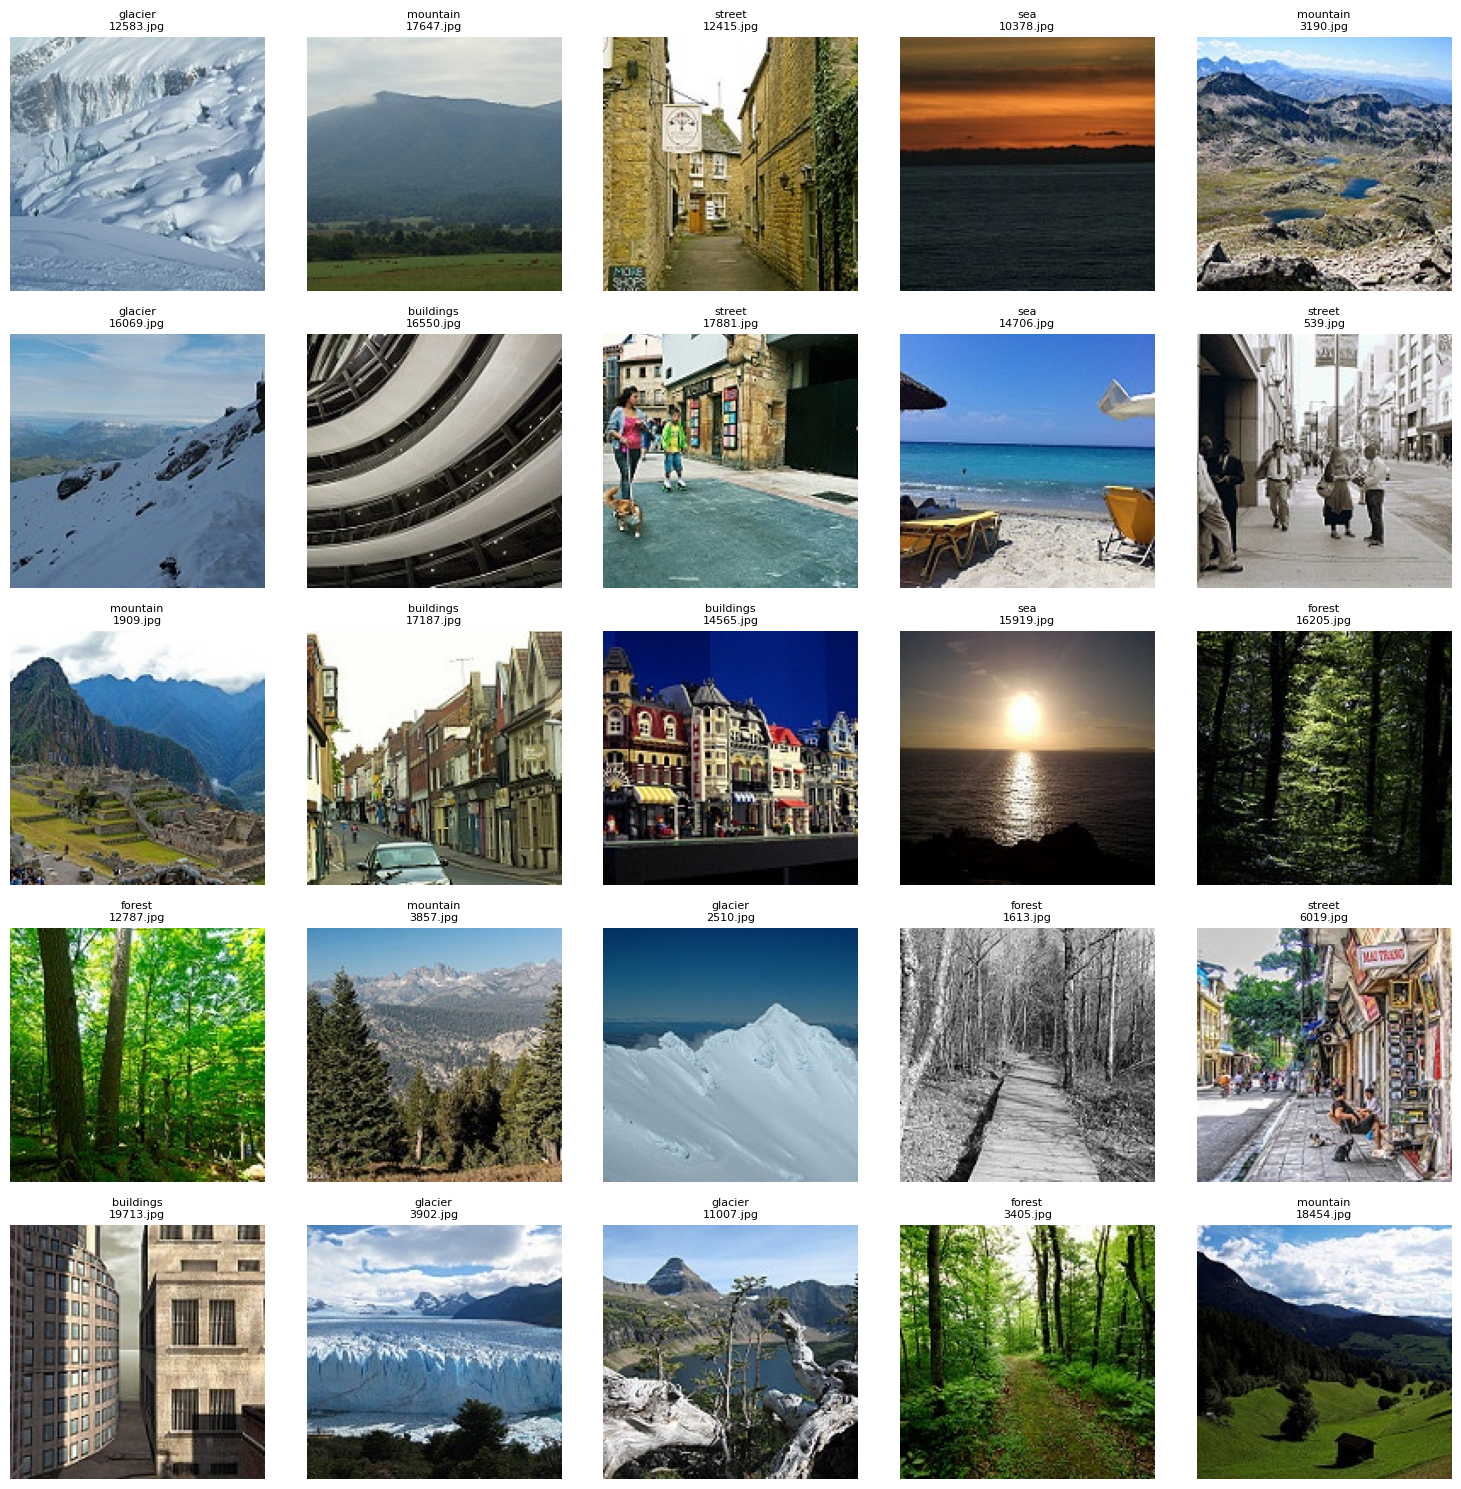

In [7]:
!pip install mplcursors

import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import mplcursors

# Define the paths to training data
train_dir = 'archive/seg_train/seg_train'  # Replace with your path

# Categories present in the dataset
categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Function to load images and their metadata from each category
def load_images_from_category(category, num_images):
    path = os.path.join(train_dir, category)
    images = os.listdir(path)
    selected_images = random.sample(images, num_images)
    return [(Image.open(os.path.join(path, img)), category, img) for img in selected_images]

# Function to display images with tooltips
def display_images_with_tooltips(images):
    fig, axes = plt.subplots(5, 5, figsize=(15, 15))
    axes = axes.flatten()

    for (img, category, img_name), ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"{category}\n{img_name}", fontsize=8)
    
    plt.tight_layout()
    cursor = mplcursors.cursor(hover=True)
    cursor.connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_title()))
    plt.show()

# Load 5 images from each category
images_grid = []
for category in categories:
    images_grid.extend(load_images_from_category(category, 5))

# Shuffle the images to randomize their order
random.shuffle(images_grid)

# Display the images with tooltips
display_images_with_tooltips(images_grid)

# 3 - Data Reduction

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
 
# Reshape images from (n_samples, 50, 50, 3) to (n_samples, 50*50*3)
n_samples, height, width, channels = images.shape
flattened_images = images.reshape(n_samples, height * width * channels)
 
# Standardize the data by subtracting the mean and dividing by the standard deviation
flattened_images = flattened_images.astype('float32') / 255.0  # Normalize pixel values between 0 and 1

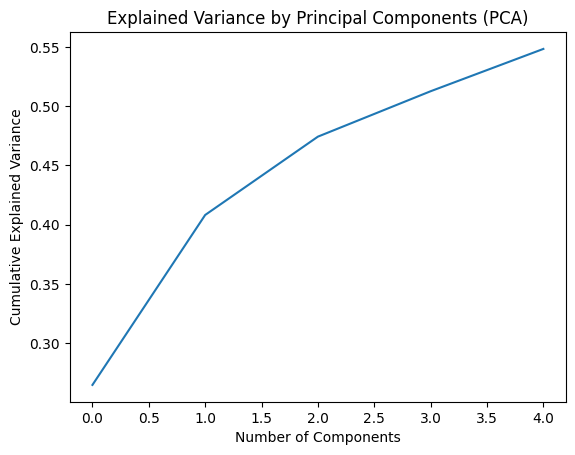

Original shape: (14034, 12288)
Reduced shape after PCA: (14034, 5)


In [12]:
# Perform PCA
pca = PCA(n_components=5)  # Keep 95% of variance
pca_result = pca.fit_transform(flattened_images)
 
# Explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
 
# Plot explained variance
plt.plot(explained_variance)
plt.title('Explained Variance by Principal Components (PCA)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
 
print(f"Original shape: {flattened_images.shape}")
print(f"Reduced shape after PCA: {pca_result.shape}")

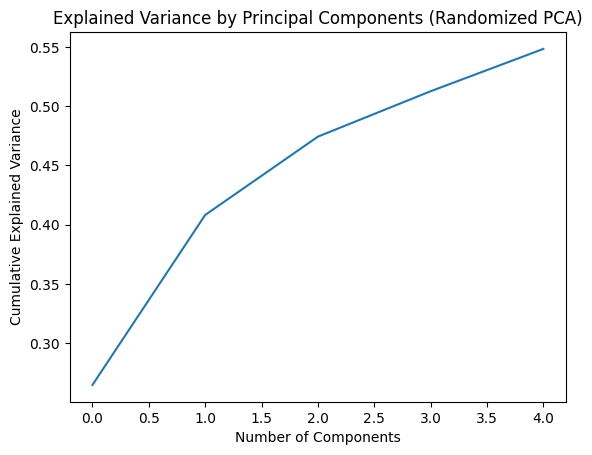

Original shape: (14034, 12288)
Reduced shape after Randomized PCA: (14034, 5)


In [13]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Determine the number of components to keep
n_components = 5  # Example: keep 50 components


# Perform Randomized PCA
randomized_pca = PCA(n_components=n_components, svd_solver='randomized')
pca_result = randomized_pca.fit_transform(flattened_images)

# Explained variance
explained_variance = np.cumsum(randomized_pca.explained_variance_ratio_)

# Plot explained variance
plt.plot(explained_variance)
plt.title('Explained Variance by Principal Components (Randomized PCA)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

print(f"Original shape: {flattened_images.shape}")
print(f"Reduced shape after Randomized PCA: {pca_result.shape}")

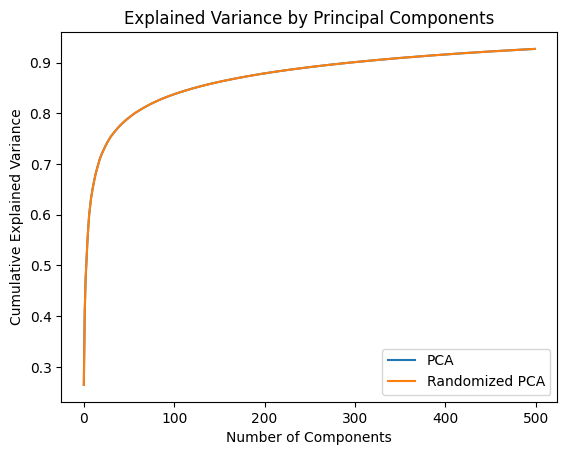

Original shape: (14034, 12288)
Reduced shape after PCA: (14034, 500)
Reduced shape after Randomized PCA: (14034, 500)


In [14]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Determine the number of components to keep
n_components = 500  # Example: keep 50 components

# Perform PCA
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(flattened_images)

# Perform Randomized PCA
randomized_pca = PCA(n_components=n_components, svd_solver='randomized')
randomized_pca_result = randomized_pca.fit_transform(flattened_images)

# Explained variance
explained_variance_pca = np.cumsum(pca.explained_variance_ratio_)
explained_variance_randomized_pca = np.cumsum(randomized_pca.explained_variance_ratio_)

# Plot explained variance
plt.plot(explained_variance_pca, label='PCA')
plt.plot(explained_variance_randomized_pca, label='Randomized PCA')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()

print(f"Original shape: {flattened_images.shape}")
print(f"Reduced shape after PCA: {pca_result.shape}")
print(f"Reduced shape after Randomized PCA: {randomized_pca_result.shape}")

Loading dataset...
Dataset contains 3000 samples with 4096 features each.
Number of classes: 6

Evaluating with n_components = 5
PCA reconstruction error: 0.0235, time taken: 15.2115s
Randomized PCA reconstruction error: 0.0235, time taken: 5.7383s

Evaluating with n_components = 10
PCA reconstruction error: 0.0186, time taken: 11.2934s
Randomized PCA reconstruction error: 0.0186, time taken: 7.4288s

Evaluating with n_components = 15
PCA reconstruction error: 0.0164, time taken: 12.9679s
Randomized PCA reconstruction error: 0.0164, time taken: 6.5700s

Evaluating with n_components = 25
PCA reconstruction error: 0.0139, time taken: 16.6622s
Randomized PCA reconstruction error: 0.0139, time taken: 8.2159s

Evaluating with n_components = 50
PCA reconstruction error: 0.0109, time taken: 14.5069s
Randomized PCA reconstruction error: 0.0109, time taken: 8.6014s

Evaluating with n_components = 75
PCA reconstruction error: 0.0094, time taken: 12.4862s
Randomized PCA reconstruction error: 0.00

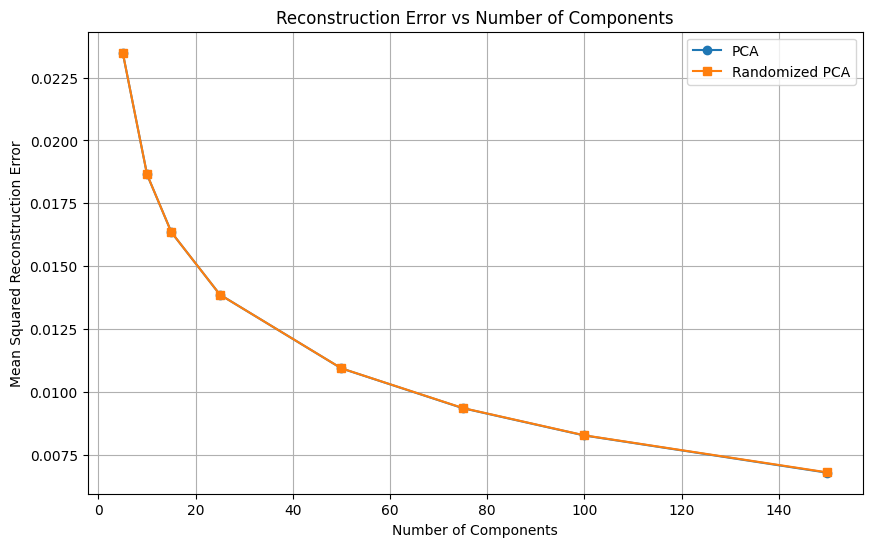

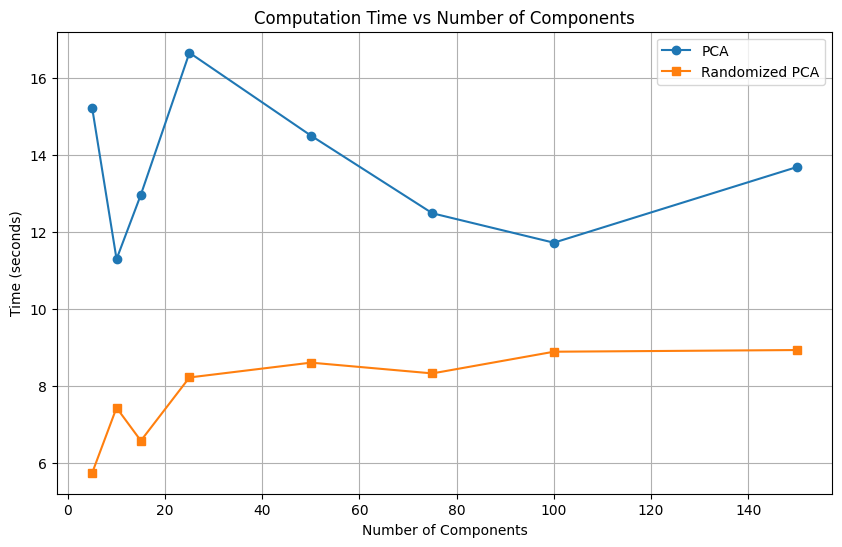

In [15]:
import numpy as np
import os
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time

dataset_path = 'archive/seg_test/seg_test'

# Function to load images and flatten them
def load_images(dataset_path, img_size=(64, 64)):
    X = []
    y = []
    class_labels = os.listdir(dataset_path)
    for idx, label in enumerate(class_labels):
        class_folder = os.path.join(dataset_path, label)
        if not os.path.isdir(class_folder):
            continue
        for file in os.listdir(class_folder):
            if file.endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(class_folder, file)
                try:
                    img = Image.open(img_path).convert('L')  # Convert to grayscale
                    img = img.resize(img_size)
                    img_array = np.array(img).flatten()
                    X.append(img_array)
                    y.append(idx)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    X = np.array(X)
    y = np.array(y)
    return X, y, class_labels

# Load the dataset
print("Loading dataset...")
X, y, class_labels = load_images(dataset_path)
n_samples, n_features = X.shape
print(f"Dataset contains {n_samples} samples with {n_features} features each.")
print(f"Number of classes: {len(class_labels)}")

# Normalize the data
X = X / 255.0  # Normalize pixel values to [0, 1]

# Define the range of principal components to test
n_components_list = [5, 10, 15, 25, 50, 75, 100, 150]

# Lists to store reconstruction errors and computation times
pca_reconstruction_error = []
rpca_reconstruction_error = []
pca_times = []
rpca_times = []

for n_components in n_components_list:
    print(f"\nEvaluating with n_components = {n_components}")
    
    # Standard PCA
    start_time = time.time()
    pca = PCA(n_components=n_components, svd_solver='full')
    X_pca = pca.fit_transform(X)
    X_pca_inverse = pca.inverse_transform(X_pca)
    end_time = time.time()
    pca_time = end_time - start_time
    pca_times.append(pca_time)
    pca_error = mean_squared_error(X, X_pca_inverse)
    pca_reconstruction_error.append(pca_error)
    print(f"PCA reconstruction error: {pca_error:.4f}, time taken: {pca_time:.4f}s")
    
    # Randomized PCA
    start_time = time.time()
    rpca = PCA(n_components=n_components, svd_solver='randomized', random_state=42)
    X_rpca = rpca.fit_transform(X)
    X_rpca_inverse = rpca.inverse_transform(X_rpca)
    end_time = time.time()
    rpca_time = end_time - start_time
    rpca_times.append(rpca_time)
    rpca_error = mean_squared_error(X, X_rpca_inverse)
    rpca_reconstruction_error.append(rpca_error)
    print(f"Randomized PCA reconstruction error: {rpca_error:.4f}, time taken: {rpca_time:.4f}s")

# Plot the reconstruction errors
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, pca_reconstruction_error, marker='o', label='PCA')
plt.plot(n_components_list, rpca_reconstruction_error, marker='s', label='Randomized PCA')
plt.title('Reconstruction Error vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Reconstruction Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot the computation times
plt.figure(figsize=(10, 6))
plt.plot(n_components_list, pca_times, marker='o', label='PCA')
plt.plot(n_components_list, rpca_times, marker='s', label='Randomized PCA')
plt.title('Computation Time vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

### COMPARISON
We defintely prefer RANDOMIZED PCA over PCA, because Randomized PCA is much faster in every case, especially when there are fewer components.

Loading dataset...
Loaded 14034 images from 7 classes.
Extracting DAISY features...
Extracted DAISY features with shape: (14034, 1664)
Performing PCA on DAISY features...
Reduced DAISY features to shape: (14034, 50)
Visualizing DAISY descriptors...


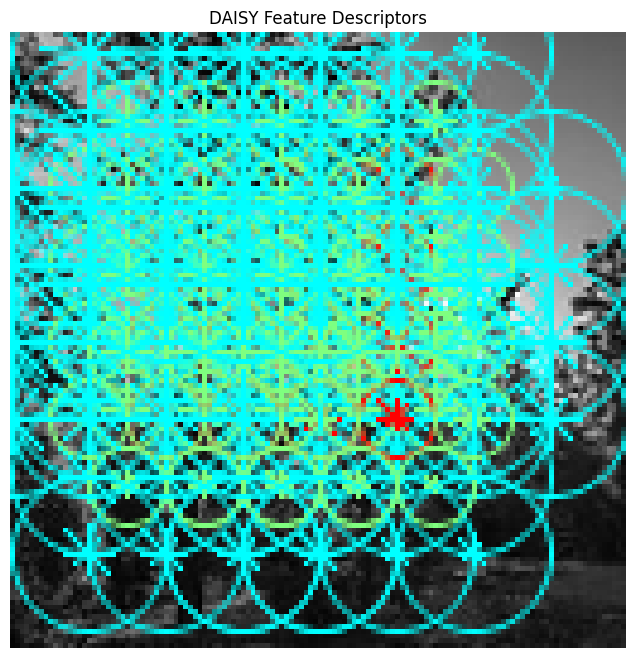

In [21]:
import numpy as np
import os
from PIL import Image
from skimage.feature import daisy
from skimage.color import rgb2gray
from skimage import io
import matplotlib.pyplot as plt

dataset_path = 'archive/seg_train/seg_train/'

# Function to load images
def load_images(dataset_path, img_size=(128, 128)):
    images = []
    labels = []
    class_labels = os.listdir(dataset_path)
    for idx, label in enumerate(class_labels):
        class_folder = os.path.join(dataset_path, label)
        if not os.path.isdir(class_folder):
            continue
        for file in os.listdir(class_folder):
            if file.endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(class_folder, file)
                try:
                    img = io.imread(img_path)
                    img = rgb2gray(img)
                    img = Image.fromarray((img * 255).astype(np.uint8))
                    img = img.resize(img_size)
                    img = np.array(img) / 255.0  # Normalize to [0, 1]
                    images.append(img)
                    labels.append(idx)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    images = np.array(images)
    labels = np.array(labels)
    return images, labels, class_labels

# Load the dataset
print("Loading dataset...")
X_images, y_labels, class_labels = load_images(dataset_path)
print(f"Loaded {len(X_images)} images from {len(class_labels)} classes.")

# Perform DAISY feature extraction
print("Extracting DAISY features...")
daisy_features = []
for idx, img in enumerate(X_images):
    descs = daisy(
        img,
        step=16,
        radius=32,
        rings=2,
        histograms=6,
        orientations=8,
        visualize=False
    )
    # Flatten the descriptors to create a feature vector
    descs_flat = descs.flatten()
    daisy_features.append(descs_flat)

daisy_features = np.array(daisy_features)
print(f"Extracted DAISY features with shape: {daisy_features.shape}")

# Example: Use PCA on DAISY features (optional)
from sklearn.decomposition import PCA

print("Performing PCA on DAISY features...")
pca = PCA(n_components=50)
daisy_features_pca = pca.fit_transform(daisy_features)
print(f"Reduced DAISY features to shape: {daisy_features_pca.shape}")

# Optionally, you can use these features for classification, clustering, etc.

# Example: Visualize DAISY descriptors on an image
print("Visualizing DAISY descriptors...")
sample_img = X_images[0]
descs, descs_img = daisy(
    sample_img,
    step=16,
    radius=32,
    rings=2,
    histograms=6,
    orientations=8,
    visualize=True
)

plt.figure(figsize=(8, 8))
plt.imshow(descs_img, cmap='gray')
plt.title('DAISY Feature Descriptors')
plt.axis('off')
plt.show()

### Visualize the Differences between Statistics of Extracted Features in each Target class
	•	We calculate the mean DAISY feature vector for each class.
	•	Plotting these means helps us see if different classes have distinct feature patterns.

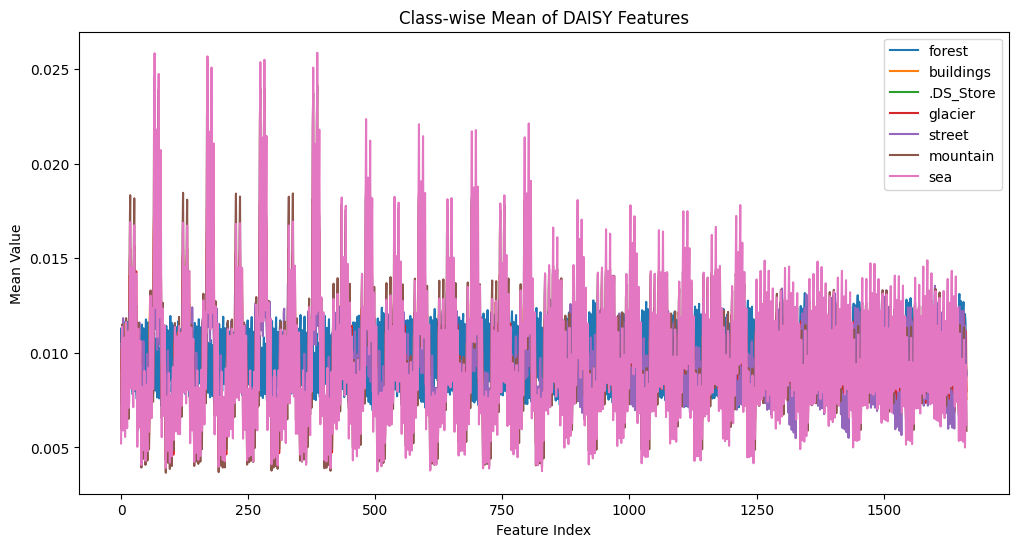

In [23]:
# Compute mean and standard deviation per class
class_means = []
class_stds = []
for idx in range(len(class_labels)):
    class_features = daisy_features[y_labels == idx]
    class_mean = np.mean(class_features, axis=0)
    class_std = np.std(class_features, axis=0)
    class_means.append(class_mean)
    class_stds.append(class_std)

class_means = np.array(class_means)
class_stds = np.array(class_stds)

# Visualize class means
plt.figure(figsize=(12, 6))
for idx, label in enumerate(class_labels):
    plt.plot(class_means[idx], label=label)
plt.title('Class-wise Mean of DAISY Features')
plt.xlabel('Feature Index')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

### Heat Map of Pairwise Differences Among All Extracted Features

We’ll compute the pairwise distances between class mean feature vectors and visualize them using a heat map.

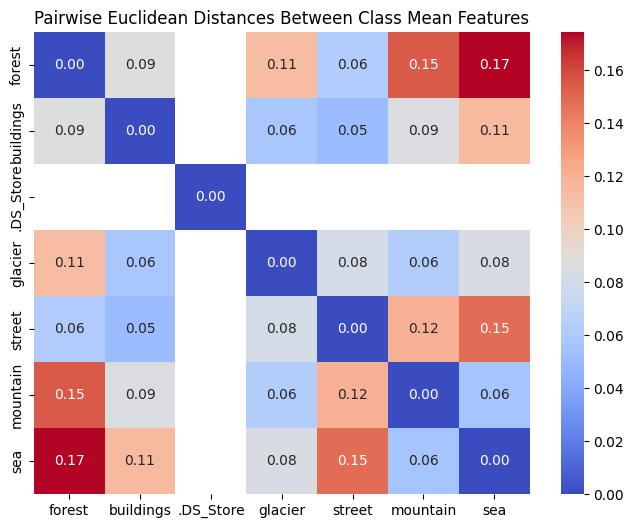

In [25]:
from scipy.spatial.distance import pdist, squareform
import seaborn as sns

# Compute pairwise distances between class means
pairwise_distances = pdist(class_means, metric='euclidean')
distance_matrix = squareform(pairwise_distances)

# Plot heat map
plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, annot=True, fmt=".2f",
            xticklabels=class_labels, yticklabels=class_labels, cmap='coolwarm')
plt.title('Pairwise Euclidean Distances Between Class Mean Features')
plt.show()

Explanation:

	•	The heat map shows how similar or different the classes are based on their mean feature vectors.
	•	Lower distances indicate higher similarity.

### A Nearest Neighbor Classifier to Assess Classification Performance

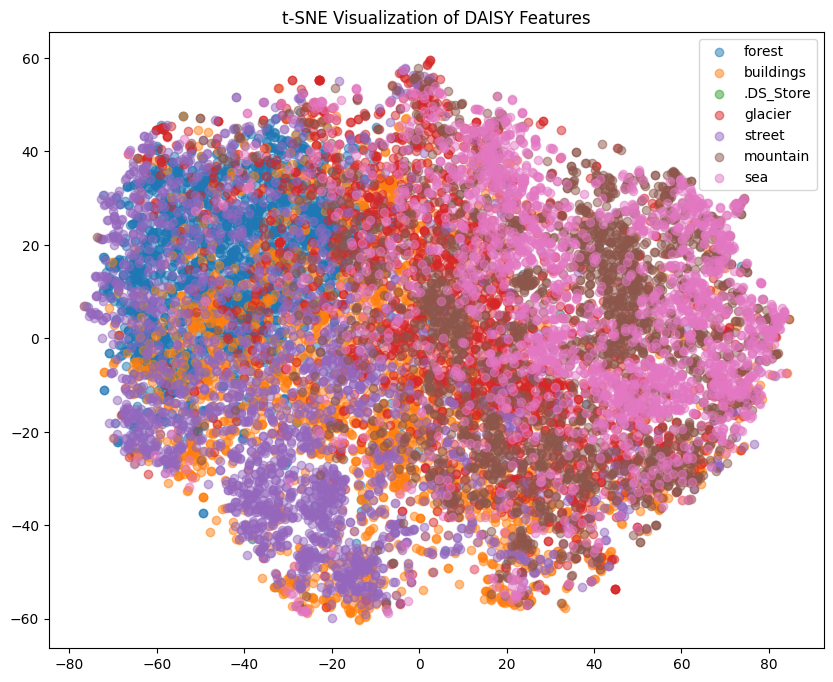

In [28]:
# Split the data into training and testing sets, train a K-NN classifier, and check its performance

import numpy as np
import os
from PIL import Image
from skimage.feature import daisy
from skimage.color import rgb2gray
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Standardize features
scaler = StandardScaler()
daisy_features_scaled = scaler.fit_transform(daisy_features)

# Reduce dimensionality with PCA for visualization
pca = PCA(n_components=50)
daisy_features_pca = pca.fit_transform(daisy_features_scaled)

# Visualize with t-SNE
tsne = TSNE(n_components=2, random_state=42)
daisy_features_tsne = tsne.fit_transform(daisy_features_pca)

plt.figure(figsize=(10, 8))
for idx, label in enumerate(class_labels):
    plt.scatter(
        daisy_features_tsne[y_labels == idx, 0],
        daisy_features_tsne[y_labels == idx, 1],
        label=label,
        alpha=0.5
    )
plt.title('t-SNE Visualization of DAISY Features')
plt.legend()
plt.show()

Explanation:

	•	We used PCA to reduce dimensionality for t-SNE visualization.
	•	t-SNE helps visualize high-dimensional data in 2D while preserving local structure.
	•	The scatter plot shows how well the classes are separated.

Classification Report:
              precision    recall  f1-score   support

      forest       0.51      0.98      0.67       454
   buildings       0.58      0.41      0.48       438
     glacier       0.51      0.41      0.46       481
      street       0.75      0.44      0.56       476
    mountain       0.59      0.58      0.59       503
         sea       0.66      0.65      0.65       455

    accuracy                           0.58      2807
   macro avg       0.60      0.58      0.57      2807
weighted avg       0.60      0.58      0.57      2807



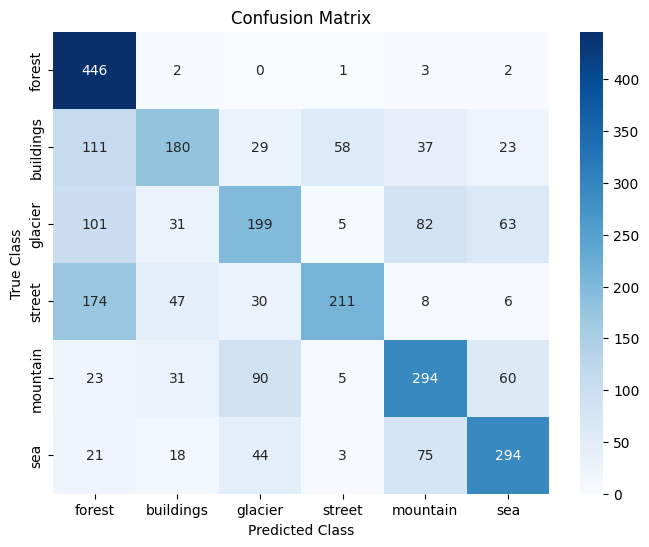

In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    daisy_features_scaled, y_labels, test_size=0.2, random_state=42, stratify=y_labels)

# ... (previous code remains unchanged)

# Training the k-NN Classifier
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    daisy_features_scaled, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)

# Train k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate classifier
y_pred = knn.predict(X_test)

# Identify the unique labels in y_test
unique_labels = np.unique(y_test)

# Map the unique labels to their corresponding class names
unique_class_labels = [class_labels[label] for label in unique_labels]

# Generate the classification report with correct labels
print("Classification Report:")
print(classification_report(
    y_test,
    y_pred,
    labels=unique_labels,
    target_names=unique_class_labels
))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=unique_class_labels,
    yticklabels=unique_class_labels,
    cmap='Blues'
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### Final Thoughts
The DAISY feature extraction method demonstrates promise for our prediction task based on the analyses performed. By visualizing the statistical differences between classes, observing the clustering in t-SNE plots, and achieving reasonable classification performance with a simple k-NN classifier, we have strong evidence that DAISY features are effective for this dataset.

### Citations
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.

https://www.jcchouinard.com/pca-explained-variance/